In [4]:
%matplotlib inline

from pymongo import MongoClient
import math
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [5]:
def divtd(td1, td2):
    us1 = td1.microseconds + 1000000 * (td1.seconds + 86400 * td1.days)
    us2 = td2.microseconds + 1000000 * (td2.seconds + 86400 * td2.days)
    return float(us1) / us2

try:
    import config
    print('using local config file')
    mongodb_uri = config.mongodb_uri
except:
    print('using environment variable')
    mongodb_uri = os.getenv('MONGODB_URI')

using local config file


In [6]:
print("Analyzing Data")
success = True

if success:
    try:
        client = MongoClient(mongodb_uri)
        db = client.get_database()
    except Exception as e:
        print('mongo login error ', str(e))
        success = False
if success:
    try:
        dataCursor = db.percentageMoveTest.find(projection={'_id': False},sort=[("timestamp", 1)])
    except Exception as e:
        print('mongo data cursor error ', str(e))
        success = False
        
if success:
    try:
        df =  pd.DataFrame(list(dataCursor)).set_index(['timestamp'])
        print(df)
        increase = df+1
        cumulative = increase.cumprod(axis=0)
        cumulative = cumulative - cumulative.iloc[0]
        print(cumulative)
    except Exception as e:
        print('mongo data cursor error ', str(e))
        success = False  
        
"""       
if success:
    try:
        dataCursor = db.tracking.find(projection={'_id': False},sort=[("timestamp", 1)])
    except Exception as e:
        print('mongo data cursor error ', str(e))
        success = False
        
if success:
    try:
        tracking =  pd.DataFrame(list(dataCursor)).set_index(['timestamp'])
        print(tracking)
    except Exception as e:
        print('mongo data cursor error ', str(e))
        success = False 
"""



Analyzing Data
                         90dayTreasury     portfolio           spy  \
timestamp                                                            
2016-09-15 13:30:08.905   1.042600e-07  9.502560e-06  1.732656e-05   
2016-09-15 13:31:08.905   1.042600e-07 -1.068206e-05  9.669740e-06   
2016-09-15 13:32:08.905   1.042600e-07 -2.054629e-05 -1.907024e-05   
2016-09-15 13:33:08.905   1.042600e-07  2.051233e-05 -1.202655e-06   
2016-09-15 13:34:08.905   1.042600e-07  3.165038e-05  3.346574e-05   
2016-09-15 13:35:08.905   1.042600e-07 -4.241881e-07  4.377680e-05   
2016-09-15 13:36:08.905   1.042600e-07  1.150198e-05  1.056903e-05   
2016-09-15 13:37:08.905   1.042600e-07 -2.756307e-06 -2.638356e-06   
2016-09-15 13:38:08.905   1.042600e-07 -1.248820e-05  2.048732e-05   
2016-09-15 13:39:08.905   1.042600e-07  1.104375e-05  1.261777e-05   
2016-09-15 13:40:08.905   1.042600e-07  2.284670e-05  5.897027e-06   
2016-09-15 13:41:08.905   1.042600e-07 -5.786695e-06  1.419843e-05   
2016-

'       \nif success:\n    try:\n        dataCursor = db.tracking.find(projection={\'_id\': False},sort=[("timestamp", 1)])\n    except Exception as e:\n        print(\'mongo data cursor error \', str(e))\n        success = False\n        \nif success:\n    try:\n        tracking =  pd.DataFrame(list(dataCursor)).set_index([\'timestamp\'])\n        print(tracking)\n    except Exception as e:\n        print(\'mongo data cursor error \', str(e))\n        success = False \n'

/Users/stephan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


"\n    plt.figure()\n    plt.plot(tracking['spyTarget'])\n    plt.plot(tracking['tltTarget'])\n    plt.plot(tracking['spyActual'])\n    plt.plot(tracking['tltActual'])\n    plt.legend()\n"

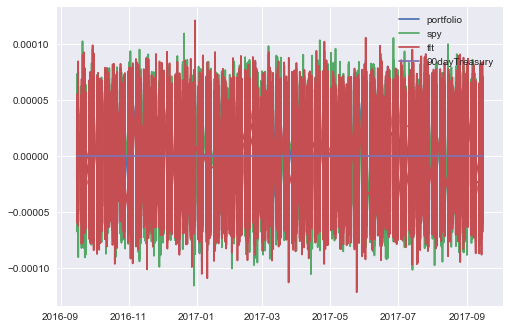

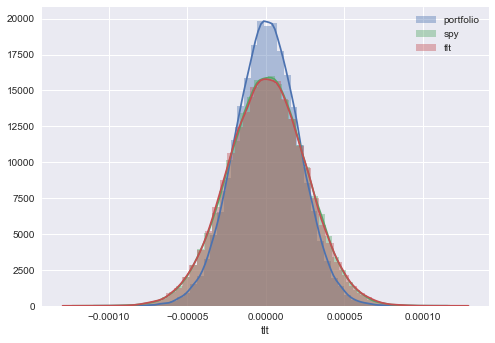

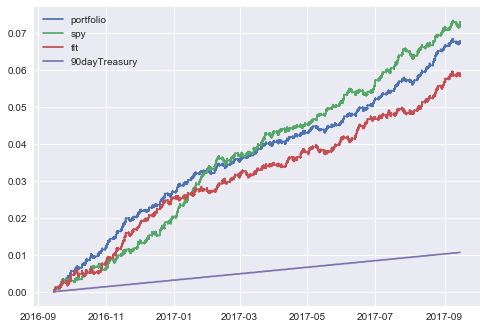

In [7]:
if success:
    plt.figure()
    plt.plot(df['portfolio'])
    plt.plot(df['spy'])
    plt.plot(df['tlt'])
    plt.plot(df['90dayTreasury'])
    plt.legend()
    plt.figure()
    sns.distplot(df['portfolio'],label="portfolio")
    sns.distplot(df['spy'],label="spy")
    sns.distplot(df['tlt'],label="tlt")
    plt.legend()
    
    plt.figure()
    plt.plot(cumulative['portfolio'])
    plt.plot(cumulative['spy'])
    plt.plot(cumulative['tlt'])
    plt.plot(cumulative['90dayTreasury'])
    plt.legend()
"""
    plt.figure()
    plt.plot(tracking['spyTarget'])
    plt.plot(tracking['tltTarget'])
    plt.plot(tracking['spyActual'])
    plt.plot(tracking['tltActual'])
    plt.legend()
"""


In [8]:
if success:
    df['elapsed'] = df.index-df.index[0]
    year = datetime.timedelta(days=365)
    percentageOfYear = divtd((df['elapsed'])[-1], year)
    
    df['spyExcess'] = df['spy']-df['90dayTreasury']
    df['tltExcess'] = df['tlt']-df['90dayTreasury']
    df['portfolioExcess'] = df['portfolio']-df['90dayTreasury']
    df['spyInfoExcess'] = df['portfolio']-df['spy']
    df['tltInfoExcess'] = df['portfolio']-df['tlt']
    
    
    meanSpyExcess = df['spyExcess'].mean()
    meanTltExcess = df['tltExcess'].mean()
    meanPortfolioExcess = df['portfolioExcess'].mean()
    meanSpyInfoExcess = df['spyInfoExcess'].mean()
    meanTltInfoExcess = df['tltInfoExcess'].mean()
    
    stdSpyExcess = df['spyExcess'].std()
    stdTltExcess = df['tltExcess'].std()
    stdPortfolioExcess = df['portfolioExcess'].std()
    stdSpyInfoExcess = df['spyInfoExcess'].std()
    stdTltInfoExcess = df['tltInfoExcess'].std()
    
    rawSpySharpe = meanSpyExcess/stdSpyExcess
    spySharpe = math.sqrt(len(df.index)/percentageOfYear)*rawSpySharpe
    print('rawSpySharpe = ',rawSpySharpe)
    print('spySharpe = ',spySharpe)
    
    rawTltSharpe = meanTltExcess/stdTltExcess
    tltSharpe = math.sqrt(len(df.index)/percentageOfYear)*rawTltSharpe
    print('\nrawTltSharpe = ',rawTltSharpe)
    print('tltSharpe = ',tltSharpe)
    
    rawPortfolioSharpe = meanPortfolioExcess/stdPortfolioExcess
    portfolioSharpe = math.sqrt(len(df.index)/percentageOfYear)*rawPortfolioSharpe
    print('\nrawPortfolioSharpe = ',rawPortfolioSharpe)
    print('portfolioSharpe = ',portfolioSharpe)
    
    rawSpyInfo = meanSpyInfoExcess/stdSpyInfoExcess
    spyInfo = math.sqrt(len(df.index)/percentageOfYear)*rawSpyInfo
    print('\nrawSpyInfo = ',rawSpyInfo)
    print('spyInfo = ',spyInfo)
    
    rawTltInfo = meanTltInfoExcess/stdTltInfoExcess
    tltInfo = math.sqrt(len(df.index)/percentageOfYear)*rawTltInfo
    print('\nrawTltInfo = ',rawTltInfo)
    print('tltInfo = ',tltInfo)

rawSpySharpe =  0.023714994301015098
spySharpe =  7.573737144914237

rawTltSharpe =  0.018223688564120502
tltSharpe =  5.8200067536815885

rawPortfolioSharpe =  0.026639517942380415
portfolioSharpe =  8.507727389762842

rawSpyInfo =  -0.0023447851919255955
spyInfo =  -0.7488421240806115

rawTltInfo =  0.00418716963886792
tltInfo =  1.337235076821995
